
# Project: Investigate a Dataset - [NoShowAppointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#eda">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The Dataset contains information from 100k medical appointments in Brazil. It contains records about each patients and a number of characteristics specific to them. The raw Dataset contains 12 columns and 1245 rows. The description of some of the columns include:

1. ‘ScheduledDay’ : tells us on what day the patient set up their appointment.
2. Neighborhood’: indicates the location of the hospital.
3. ‘Scholarship’:  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. 'No show': It tells us whether or not they showed up for their appointment. No for showing up and yes for not showing up.



### Question(s) for Analysis

1. What is the rate of not showing up for the appointment vs showing up for the appointment?
2. What characteristic has the most effect on if a patient will show up for the appointment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Loading the First Few columns of the Data
df=pd.read_csv('appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#This describes the number of rows and columns in the Dataset
df.shape

(110527, 14)

In [4]:
#This is to check for nulls or missing data that could be present in the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking for duplicated values
print('No of Duplicated values : ', + sum(df.duplicated()))
#checking to confirm that no age is less than 0
df[df["Age"] <= 0]

No of Duplicated values :  0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
#Summary of the Data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# DATA CLEANING:

DESCRIPTION OF DATA QUALITY ISSUES:
The Data was explored to check for the quality of the Data and identify data quality issues that could be present. The Dataset contained no missing values and had correct Data types excluding the ScheduledDay and AppointmentDay that were supposed to be in DateTime format. 
After exploration of the Data, the following Data quality issues have been identified:

1. Incorrect spelling of some of the columns names
2. Some of the ages were zero

In [8]:
#to fix the column names:
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#to replace the ages that are zero with the mean of ages
meanAge = df['Age'].mean()
df.loc[df['Age']<= 0, 'Age'] = meanAge
df[df['Age'] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [10]:
#No’ if the patient showed up to their appointment, and 
# ‘Yes’ if they did not show up.
# ‘No’ = 0 and ‘Yes’ = 1
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
#convert datatype from object to numrical
df['No_show'] = df['No_show'].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

In [12]:
#create a mask for patients that showed up and did not
#create mask
showup = df.No_show == False
noshow = df.No_show == True

### No of Male and Female patients?

In [13]:
#To determine the number of male and female patients
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

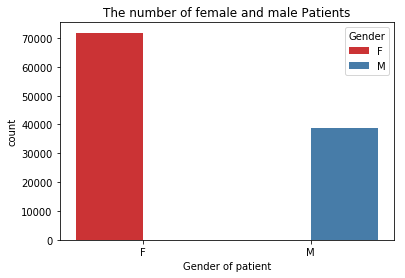

In [14]:
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

sb.countplot(data = df, x = 'Gender', palette="Set1",  hue = df.Gender)
plt.title("The number of female and male Patients")
plt.xlabel("Gender of patient")
plt.show()

From the graph above, we can see that the population of female patients is about twice the population of male patients.

### Distribution of Age

Text(0.5,0,' Age of patient')

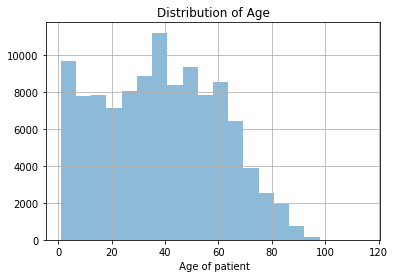

In [15]:
#A histogram showing the distribution of Age
df.Age.hist(alpha=0.5, bins=20)
plt.title("Distribution of Age")
plt.xlabel(" Age of patient")

### Percentage of appointment show-up vs No-show

(-1.185374422478048,
 1.1040654696031331,
 -1.0554584316156608,
 1.2339814604655204)

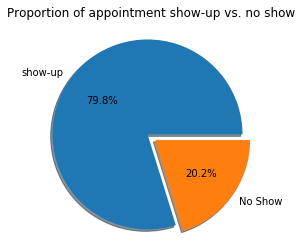

In [16]:
#to determine the rate of showing up vs not showing up using a pie chart
No_show_percentage = df.No_show.value_counts()
labels = ['show-up', 'No Show']
explode = (0.1, 0)
plt.pie(No_show_percentage, labels = labels, explode = explode, autopct= '%1.1f%%', counterclock=True, 
        textprops={'color':'black'}, shadow=True);
plt.title('Proportion of appointment show-up vs. no show');
plt.axis('square')

The proportion of patients show-up:no-show-up is 79.8%:20.2%

### Is there any relationship between gender and showing up for an appointment?

In [17]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64

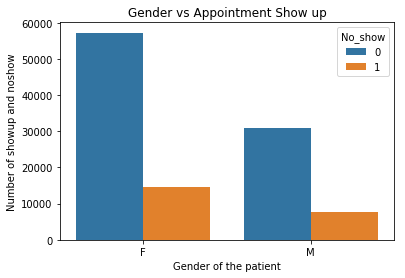

In [18]:
sns.countplot(data = df, x = 'Gender',  hue = df.No_show)
plt.title("Gender vs Appointment Show up")
plt.xlabel("Gender of the patient")
plt.ylabel("Number of showup and noshow")
plt.show()

### Is there any relationship between receiving the sms and showing up for the appointment?


([<matplotlib.axis.XTick at 0x7fb3fae0e5c0>,
 <a list of 2 Text xticklabel objects>)

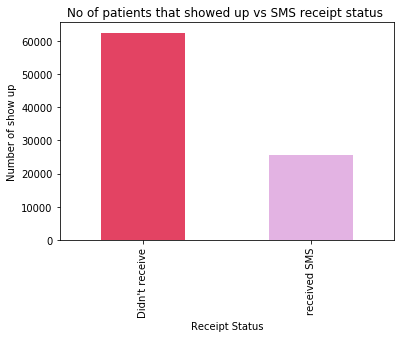

In [19]:
df.SMS_received[showup].value_counts().plot(kind='bar', alpha=0.8, color=['crimson','plum'])
plt.title("No of patients that showed up vs SMS receipt status ")
plt.xlabel("Receipt Status")
plt.ylabel("Number of show up")
plt.xticks([0, 1],["Didn't receive","received SMS"])

([<matplotlib.axis.XTick at 0x7fb3fadcb128>,
 <a list of 2 Text xticklabel objects>)

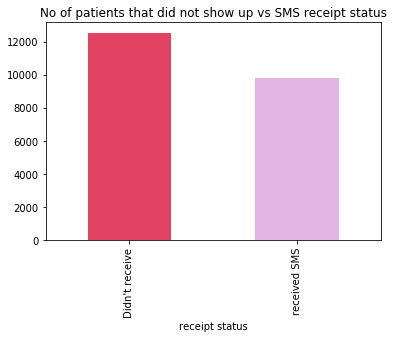

In [20]:
df.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.8, color=['crimson','plum'])
plt.title("No of patients that did not show up vs SMS receipt status")
plt.xlabel("receipt status")
plt.xticks([0, 1],["Didn't receive","received SMS"])

From the visualization above, SMS text message reminders may not be effective in reducing the nonattendance rate

### What are hospitals that have the highest number for patients who attended and didn't attend the appointment ?

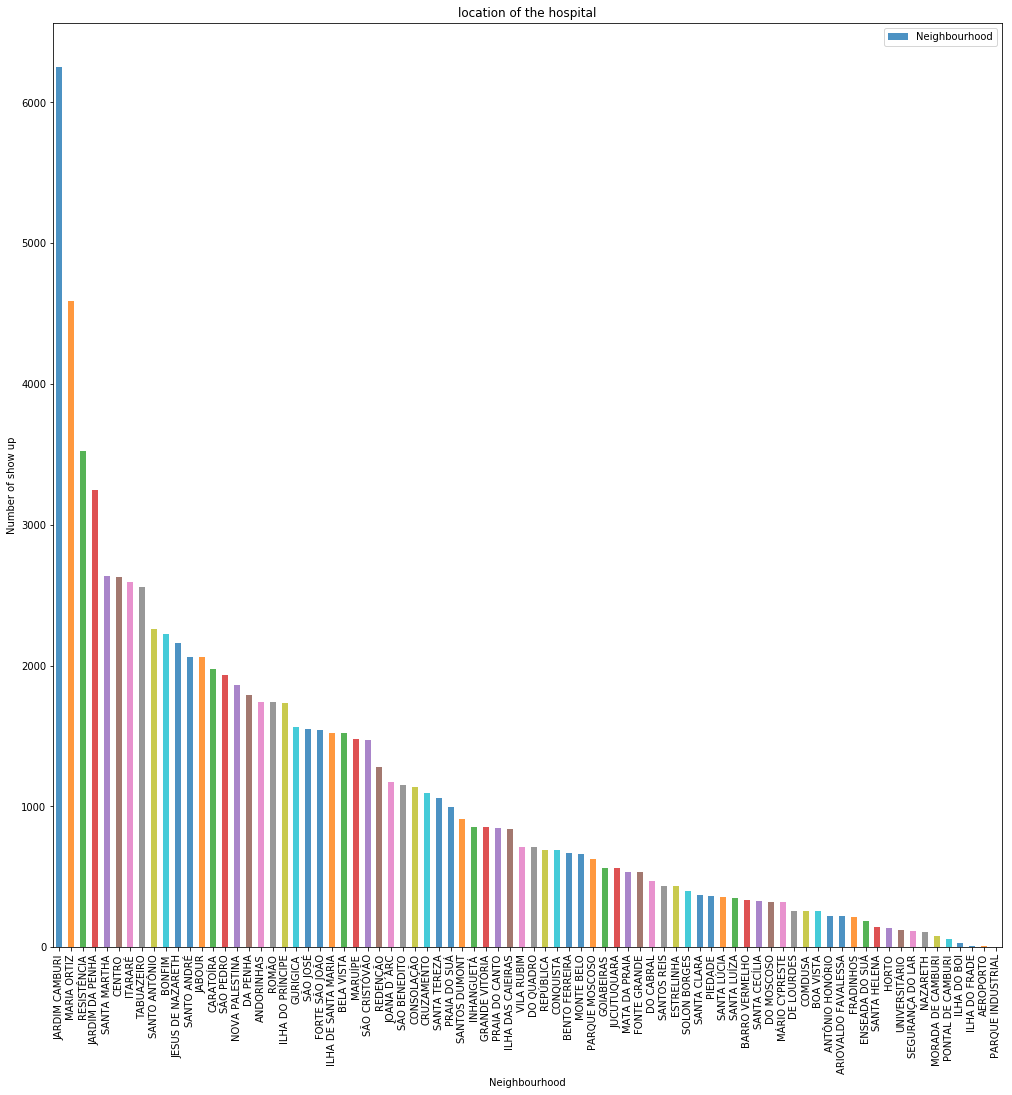

In [21]:
# the names of hospitals that have the highest number for patients who attended the appointment
df.Neighbourhood[showup].value_counts().plot(kind='bar', alpha=0.8, figsize=(17,17))
plt.title("location of the hospital")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of show up")
plt.legend();

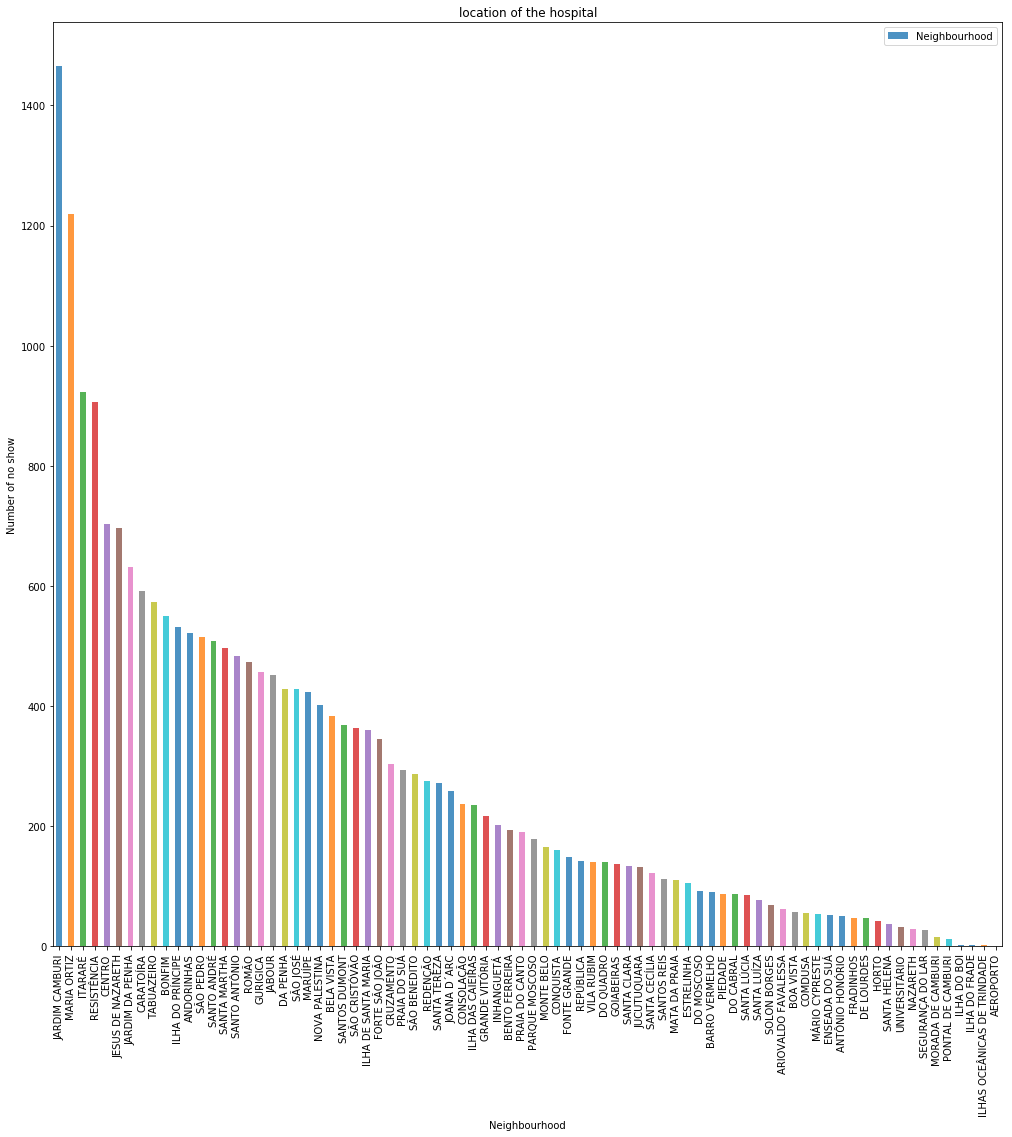

In [22]:
#The names of hospitals that have the highest number for patients who didn't attend the appointment
df.Neighbourhood[noshow].value_counts().plot(kind='bar', alpha=0.8, figsize=(17,17))
plt.title("location of the hospital")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of no show")
plt.legend();

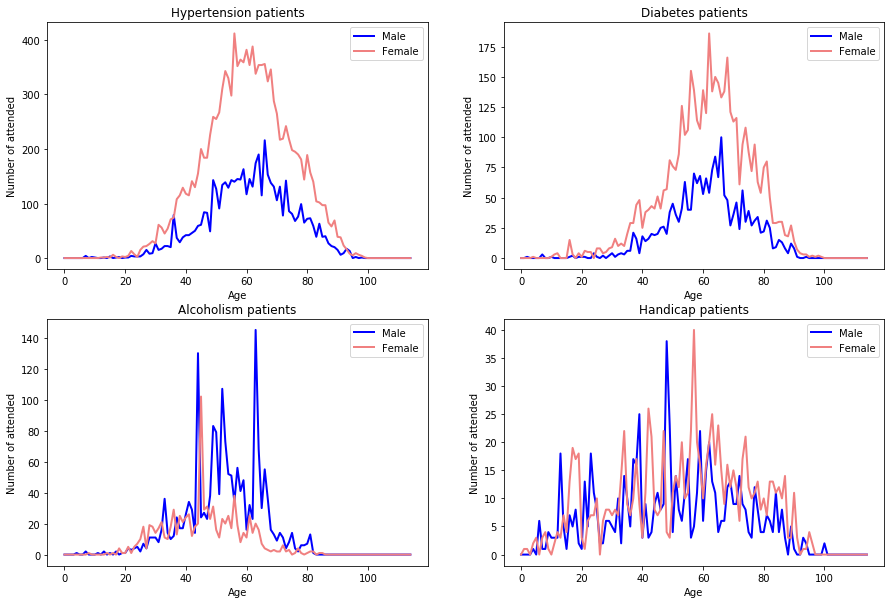

In [23]:
plt.figure(1)
plt.figure(figsize = (15,10))
disease_cols = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in disease_cols: 
    plt.subplot(int(str(22)+str((disease_cols.index(col)+1))))
    df1 = pd.DataFrame()
    df1['Age'] = range(115) 
    Male = df1.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df[col] == 1) & (df.No_show == 0 )]))
    Female = df1.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df[col] == 1)& (df.No_show == 0)]))

    # plot
    plt.plot( df1, Male , linestyle='solid', color='blue', linewidth=2)
    plt.plot( df1, Female , linestyle='solid', color='lightcoral', linewidth=2)

    plt.legend(['Male','Female'])
    plt.xlabel('Age')
    plt.ylabel('Number of attended')
    plt.title('{} patients'.format(col));

## Limitations of Data: 
    The Data contained some missing records that might have affected the analysis of the Data.

<a id='conclusions'></a>
## Conclusions

1. From the gender graph, it can be seen that number of female patients is (71839) while the number of male patients is (38687). There are about two times more females than males.
2. The proportion of patients show-up appointment is 79.8% and no show appointment is 20.2%. Total attended appointments is far greater than the number of appointments that patients did not show-up for.
3. SMS text message reminders are may not be effective in reducing the nonattendance rate.
4. The top 5 the names of hospitals that have the highest number for patients who attended the appointment: JARDIM CAMBURI (6200 patients) MARIA ORTIZ(4700 patients) RESISTENCIA(3500 patients) JARDIM DA PENHA(3200 patients) SANTA MARTHA(2700 patients)
5. The top 5 the names of hospitals that have the highest number for patients who didn't attend the appointment: JARDIM CAMBURI(1475 patients) MARIA ORTIZ(1220 patients) ITARARE(930 patients) RESISTENCIA(700 patients ) CENTRO(690 patients)
6. Hypertension and Diabetes patients are attending the appointments more when compared to other disease



## References:
https://www.statology.org/pandas-find-duplicates/
https://stackoverflow.com/questions/46794373/make-a-bar-graph-of-2-variables-based-on-a-dataframe

In [24]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])